In [1]:
from PIL import Image
import torch
from diffusers import StableDiffusionInpaintPipeline
import matplotlib.pyplot as plt
import numpy as np

C:\Users\hb\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def add_suit_to_person(image_path, mask_path, output_path):
    # Load the image and mask
    image = Image.open(image_path).convert("RGB")
    mask_image = Image.open(mask_path).convert("RGB")  # Ensure mask is also in RGB mode

    # Load the inpainting pipeline
    pipe = StableDiffusionInpaintPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-inpainting",
        torch_dtype=torch.float16,
    )
    pipe.to("cuda")  # Move model to GPU

    # Run the inpainting
    result = pipe(prompt="A formal suit on a person", image=image, mask_image=mask_image).images[0]
    
    # Save the resulting image
    result.save(output_path)

    # Display the images
    display_images(image_path, mask_path, output_path)

Loading pipeline components...:  33%|█████████████████▎                                  | 2/6 [00:01<00:01,  2.10it/s]C:\Users\hb\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.54it/s]
C:\Users\hb\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\clip\modeling_clip.py:480: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = t

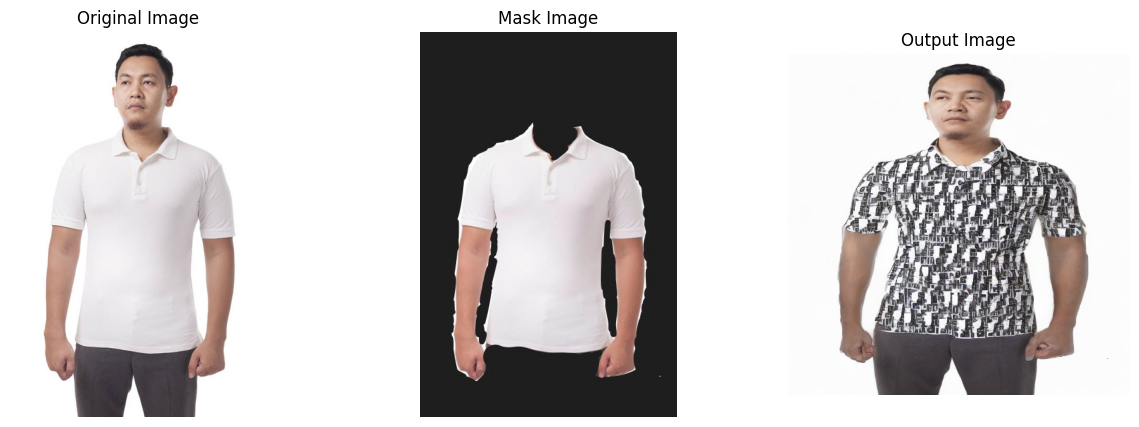

In [3]:
def display_images(image_path, mask_path, output_path):
    # Load images
    image = Image.open(image_path)
    mask_image = Image.open(mask_path)
    result_image = Image.open(output_path)
    
    # Create a figure to display images
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    # Display the original image
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis('off')
    
    # Display the mask image
    ax[1].imshow(mask_image, cmap='gray')  # Use 'gray' colormap for mask
    ax[1].set_title("Mask Image")
    ax[1].axis('off')
    
    # Display the result image
    ax[2].imshow(result_image)
    ax[2].set_title("Output Image")
    ax[2].axis('off')
    
    plt.show()

# Example function usage
add_suit_to_person("main_img.jpeg", "masked_img.jpg", "output_with_suit.png")